In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
%matplotlib inline

# something to do with the GPU, not sure WHAT
# if you are not using a GPU that shouldn't be necessary
# not sure if I am using one....
  
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print('Num GPUs Available:', len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

# Data division and preprocessing
We need to divide our data in 3:
1) **Train** (77%)

2) **Validation** (15%)

3) **Test** (8%)

In each one we divide the data between diseased and healthy.
<br>
So, we should end up with train, validation and test of diseased plants and the same for healthy.

# if you have all the labeled images mixed you can apply the following code

# Organize data into train, valid, test dirs

os.chdir('../data/train')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

    for i in random.sample(glob.glob('cat*'), 500):
        shutil.move(i, 'train/cat')      
    for i in random.sample(glob.glob('dog*'), 500):
        shutil.move(i, 'train/dog')
    for i in random.sample(glob.glob('cat*'), 100):
        shutil.move(i, 'valid/cat')        
    for i in random.sample(glob.glob('dog*'), 100):
        shutil.move(i, 'valid/dog')
    for i in random.sample(glob.glob('cat*'), 50):
        shutil.move(i, 'test/cat')      
    for i in random.sample(glob.glob('dog*'), 50):
        shutil.move(i, 'test/dog')

os.chdir('../../')

### What do you need to do differenty if your test data has no labels???

In the case where you do not know the labels for the test data, in the directory it will have a folder named unknown instead of one with cats/dogs or healthy/unhealthy. 
<br>
Moreover, you will need to modify the test_batches variable. Specifically, the change will be to set the parameters classes = None and class_mode = None in flow_from_directory()

```test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)`\
flow_from_directory(directory=test_path, target_size=(224,224), classes=None, batch_size = 10)```

## Data renaming (labeling)

In [2]:
os.getcwd()

'C:\\Users\\Usuario\\Desktop\\IH_finalproject\\Project-Week-8-Final-Project_fyuji\\your-project'

### Rename all files

In [3]:
# checking the old names
list(enumerate(os.listdir('C:\\Users\\Usuario\\Desktop\\IH_finalproject\\Project-Week-8-Final-Project_fyuji\\data\\chicken')))

[(0, 'chicken_0.jpg'),
 (1, 'chicken_1.jpg'),
 (2, 'chicken_10.jpg'),
 (3, 'chicken_100.jpg'),
 (4, 'chicken_101.jpg'),
 (5, 'chicken_102.jpg'),
 (6, 'chicken_103.jpg'),
 (7, 'chicken_104.jpg'),
 (8, 'chicken_105.jpg'),
 (9, 'chicken_106.jpg'),
 (10, 'chicken_107.jpg'),
 (11, 'chicken_108.jpg'),
 (12, 'chicken_109.jpg'),
 (13, 'chicken_11.jpg'),
 (14, 'chicken_110.jpg'),
 (15, 'chicken_111.jpg'),
 (16, 'chicken_112.jpg'),
 (17, 'chicken_113.jpg'),
 (18, 'chicken_114.jpg'),
 (19, 'chicken_115.jpg'),
 (20, 'chicken_116.jpg'),
 (21, 'chicken_117.jpg'),
 (22, 'chicken_118.jpg'),
 (23, 'chicken_119.jpg'),
 (24, 'chicken_12.jpg'),
 (25, 'chicken_120.jpg'),
 (26, 'chicken_121.jpg'),
 (27, 'chicken_122.jpg'),
 (28, 'chicken_123.jpg'),
 (29, 'chicken_124.jpg'),
 (30, 'chicken_125.jpg'),
 (31, 'chicken_126.jpg'),
 (32, 'chicken_127.jpg'),
 (33, 'chicken_128.jpg'),
 (34, 'chicken_129.jpg'),
 (35, 'chicken_13.jpg'),
 (36, 'chicken_130.jpg'),
 (37, 'chicken_131.jpg'),
 (38, 'chicken_132.jpg'),
 (39

In [4]:
# rename the files for the trial 
# files in a directory or folder 

os.chdir('C:\\Users\\Usuario\\Desktop\\IH_finalproject\\Project-Week-8-Final-Project_fyuji\\your-project')


# importing os module 
import os 
  
# Function to rename multiple files 
def main(x): 
  
    for count, filename in enumerate(os.listdir(f'../data/{x}')): 
        root = f'../data/{x}'
        src = root +'/'+ filename 
        dst =root + f"/{x}_" + str(count) + ".jpg"
          
        # rename() function will 
        # rename all the files 
        os.rename(src, dst) 

# Driver Code 
if __name__ == '__main__':

    ingredients_list = ["avocados","banana","boniato","brocolli","chicken","eggs","spinach"]

    for i in ingredients_list:
        main(i)

FileExistsError: [WinError 183] No se puede crear un archivo que ya existe: '../data/avocados/avocados_10.jpg' -> '../data/avocados/avocados_2.jpg'

In [5]:
main("spinach")

FileExistsError: [WinError 183] No se puede crear un archivo que ya existe: '../data/spinach/spinach_10.jpg' -> '../data/spinach/spinach_2.jpg'

In [6]:
# Did the renaming work?
list(enumerate(os.listdir('../data/chicken')))

#YES IT FUCKING DID


[(0, 'chicken_0.jpg'),
 (1, 'chicken_1.jpg'),
 (2, 'chicken_10.jpg'),
 (3, 'chicken_100.jpg'),
 (4, 'chicken_101.jpg'),
 (5, 'chicken_102.jpg'),
 (6, 'chicken_103.jpg'),
 (7, 'chicken_104.jpg'),
 (8, 'chicken_105.jpg'),
 (9, 'chicken_106.jpg'),
 (10, 'chicken_107.jpg'),
 (11, 'chicken_108.jpg'),
 (12, 'chicken_109.jpg'),
 (13, 'chicken_11.jpg'),
 (14, 'chicken_110.jpg'),
 (15, 'chicken_111.jpg'),
 (16, 'chicken_112.jpg'),
 (17, 'chicken_113.jpg'),
 (18, 'chicken_114.jpg'),
 (19, 'chicken_115.jpg'),
 (20, 'chicken_116.jpg'),
 (21, 'chicken_117.jpg'),
 (22, 'chicken_118.jpg'),
 (23, 'chicken_119.jpg'),
 (24, 'chicken_12.jpg'),
 (25, 'chicken_120.jpg'),
 (26, 'chicken_121.jpg'),
 (27, 'chicken_122.jpg'),
 (28, 'chicken_123.jpg'),
 (29, 'chicken_124.jpg'),
 (30, 'chicken_125.jpg'),
 (31, 'chicken_126.jpg'),
 (32, 'chicken_127.jpg'),
 (33, 'chicken_128.jpg'),
 (34, 'chicken_129.jpg'),
 (35, 'chicken_13.jpg'),
 (36, 'chicken_130.jpg'),
 (37, 'chicken_131.jpg'),
 (38, 'chicken_132.jpg'),
 (39

### Not Chicken 
(we repeat the same process)

# Train-Test Split

In [ ]:
os.listdir('/Users/Usuario/Desktop/IH_finalproject/Project-Week-8-Final-Project_fyuji/data/train')

In [ ]:
os.chdir('/Users/Usuario/Desktop/IH_finalproject/Project-Week-8-Final-Project_fyuji/data/mixed')
retval = os.getcwd()
print ("Current working directory %s" % retval)

In [ ]:
glob.glob('chicken*')

### Data selection (sample)
We select a sample of the data just to have a look if the model works

In [ ]:
# if you have all the labeled images mixed you can apply the following code

# Organize data into train, valid, test dirs

os.chdir('/Users/Usuario/Desktop/IH_finalproject/Project-Week-8-Final-Project_fyuji/data')
if os.path.isdir('train/chicken') is False:
    os.makedirs('train/chicken')
    os.makedirs('train/other')
    os.makedirs('valid/chicken')
    os.makedirs('valid/other')
    os.makedirs('test/chicken')
    os.makedirs('test/other')


os.chdir('../../')

In [ ]:
ingredients_list


In [ ]:
os.chdir('/Users/Usuario/Desktop/IH_finalproject/Project-Week-8-Final-Project_fyuji/data')

for i in ingredients_list:
    print(i)
    os.makedirs(f'train/{i}')
    os.makedirs(f'train/{i}')

In [ ]:
os.chdir('/Users/Usuario/Desktop/IH_finalproject/Project-Week-8-Final-Project_fyuji/data/mixed')

for i in ingredients_list:
    print(i)
    for i in random.sample(glob.glob(f'{i}*'), 100):
        path = f'/Users/Usuario/Desktop/IH_finalproject/Project-Week-8-Final-Project_fyuji/data/train/{i}'
        shutil.move(i, path)
    for i in random.sample(glob.glob(f'{i}*'), 15):
        path = f'/Users/Usuario/Desktop/IH_finalproject/Project-Week-8-Final-Project_fyuji/data/test/{i}'
        shutil.move(i, path) 
    for i in random.sample(glob.glob(f'{i}*'), 10):
        path = f'/Users/Usuario/Desktop/IH_finalproject/Project-Week-8-Final-Project_fyuji/data/valid/{i}'
        shutil.move(i, path) 



In [ ]:
    
    os.chdir('/Users/Usuario/Desktop/IH_finalproject/Project-Week-8-Final-Project_fyuji/data/mixed')
    for i in random.sample(glob.glob('other*'), 170):
        shutil.move(i, 'train/other')      
    for i in random.sample(glob.glob('chicken*'), 170):
        shutil.move(i, 'train/chicken')
    
        
    for i in random.sample(glob.glob('other*'), 40):
        shutil.move(i, 'valid/other')        
    for i in random.sample(glob.glob('chicken*'), 40):
        shutil.move(i, 'valid/chicken')
    for i in random.sample(glob.glob('other*'), 20):
        shutil.move(i, 'test/other')      
    for i in random.sample(glob.glob('chicken*'), 20):
        shutil.move(i, 'test/chicken')


In [2]:
# we need the paths (relative wasn't working so absolute we go)
train_path = '/Users/Usuario/Desktop/IH_finalproject/Project-Week-8-Final-Project_fyuji/data/train'
valid_path = '/Users/Usuario/Desktop/IH_finalproject/Project-Week-8-Final-Project_fyuji/data/valid'
test_path = '/Users/Usuario/Desktop/IH_finalproject/Project-Week-8-Final-Project_fyuji/data/test'

In [3]:
# puting the data in the format of a Keras generator

'''Necessary to define the size of the images so they are all the same, it can be different
batch_size can be different too I guess'''

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['avocados', "banana","boniato","brocolli","chicken","eggs"], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['avocados', "banana","boniato","brocolli","chicken","eggs"], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['avocados', "banana","boniato","brocolli","chicken","eggs"], batch_size=10, shuffle=False)

#shuffle = False for test since we need to access the unshuffled data and by default it gets shuffled

Found 551 images belonging to 6 classes.
Found 93 images belonging to 6 classes.
Found 130 images belonging to 6 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


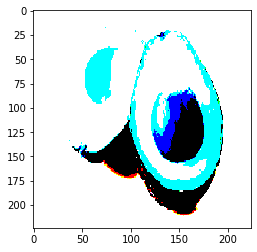

In [4]:
# grab a single batch of images and labels

imgs, labels = next(train_batches)
plt.imshow(imgs[0])

In [5]:

labels

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

## Visualise the data

In [6]:
# this function will plot images in the form of a grid with the 1 row and 10 columns where the images are placed
# from the tensor flow website
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

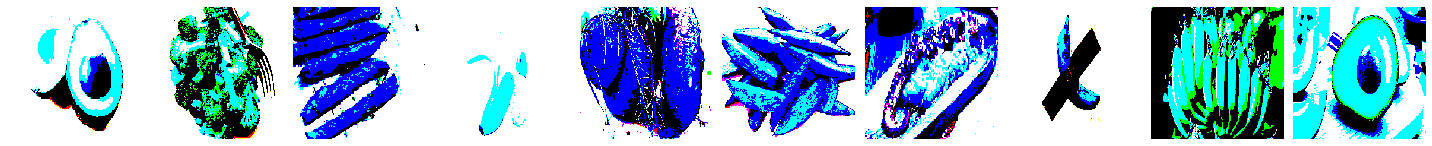

[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [7]:
# it will print the BATCH
# the colours might look weird do to the preprocessing
plotImages(imgs)
print(labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


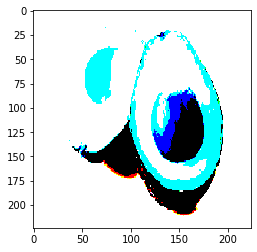

In [8]:

plt.imshow(imgs[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

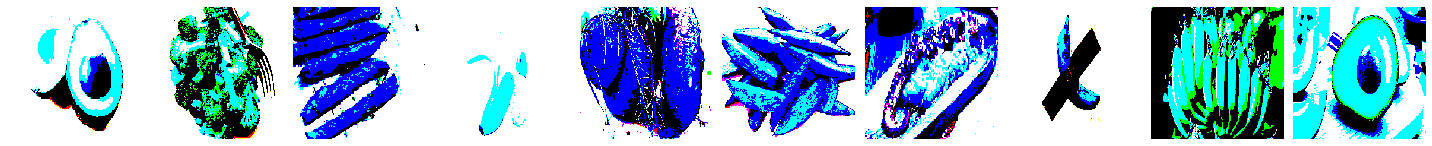

'Chicken'

In [9]:

plotImages(imgs)


dictionary = {1:"Chicken", 0:"No Pollo"}
dictionary[labels[0][0]]

## Building the model

In [10]:
# our model has an input layer, 2 hidden layers (with 32 and 64 nodes) and an output layer

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=6, activation='softmax')
])

In [11]:
# info about the model we created

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 6)                 1204230   
Total params: 1,223,622
Trainable params: 1,223,622
Non-trainable params: 0
______________________________________________

In [12]:
# optimise the data 

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# train a simple CNN

model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
          
)

Epoch 1/10
56/56 - 13s - loss: 76.6264 - accuracy: 0.3376 - val_loss: 10.7844 - val_accuracy: 0.4946
Epoch 2/10
56/56 - 12s - loss: 4.1660 - accuracy: 0.7568 - val_loss: 5.9387 - val_accuracy: 0.6452
Epoch 3/10
56/56 - 12s - loss: 1.3186 - accuracy: 0.8621 - val_loss: 2.7978 - val_accuracy: 0.8495
Epoch 4/10
56/56 - 13s - loss: 0.4004 - accuracy: 0.9456 - val_loss: 3.7477 - val_accuracy: 0.8602
Epoch 5/10
56/56 - 14s - loss: 0.4089 - accuracy: 0.9583 - val_loss: 2.7061 - val_accuracy: 0.8925
Epoch 6/10
56/56 - 14s - loss: 0.1614 - accuracy: 0.9800 - val_loss: 2.4682 - val_accuracy: 0.8817
Epoch 7/10
56/56 - 13s - loss: 0.0604 - accuracy: 0.9927 - val_loss: 2.8483 - val_accuracy: 0.8602
Epoch 8/10
56/56 - 13s - loss: 0.0421 - accuracy: 0.9909 - val_loss: 2.7971 - val_accuracy: 0.8495
Epoch 9/10
56/56 - 13s - loss: 0.0262 - accuracy: 0.9946 - val_loss: 2.4600 - val_accuracy: 0.9032
Epoch 10/10
56/56 - 13s - loss: 0.0339 - accuracy: 0.9927 - val_loss: 2.1958 - val_accuracy: 0.8495


In [14]:
os.getcwd()

'C:\\Users\\Usuario\\Desktop\\IH_finalproject\\Project-Week-8-Final-Project_fyuji\\your-project'

In [15]:
model.save("../../model_6ingredients_food_10epoch_v2.h5")


# RESNET

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import numpy as np
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, MaxPool2D, GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
import itertools



In [ ]:
resnet_model = ResNet50(weights=None, include_top=False,input_shape=(224,224,3))

In [ ]:
num_classes = 2
x = resnet_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.35)(x)
predictions = Dense(num_classes, activation="softmax")(x)
model1 = Model(inputs=resnet_model.input, outputs = predictions)

In [ ]:
resnet_model.summary()

In [ ]:
adam = Adam()
model1.compile(optimizer=adam, loss="categorical_crossentropy")

In [ ]:
model1.fit(train_batches,validation_data=valid_batches,epochs = 1)

In [ ]:
model1.save("../../resnet_50_1epoch.h5")


In [ ]:
predictions1 = model1.predict(x=test_batches, steps=len(test_batches), verbose=0)
test_batches.classes

In [ ]:
np.argmax(predictions1, axis=-1)

### Predictions

In [16]:
# let's make some predictions

predictions1 = model.predict(x=test_batches, steps=len(test_batches), verbose=0)
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [17]:
test_batches.filenames

['avocados\\avocados_100.jpg',
 'avocados\\avocados_101.jpg',
 'avocados\\avocados_102.jpg',
 'avocados\\avocados_103.jpg',
 'avocados\\avocados_104.jpg',
 'avocados\\avocados_105.jpg',
 'avocados\\avocados_106.jpg',
 'avocados\\avocados_107.jpg',
 'avocados\\avocados_108.jpg',
 'avocados\\avocados_109.jpg',
 'avocados\\avocados_110.jpg',
 'avocados\\avocados_111.jpg',
 'avocados\\avocados_112.jpg',
 'avocados\\avocados_113.jpg',
 'avocados\\avocados_114.jpg',
 'avocados\\avocados_115.jpg',
 'avocados\\avocados_116.jpg',
 'avocados\\avocados_117.jpg',
 'avocados\\avocados_118.jpg',
 'avocados\\avocados_119.jpg',
 'avocados\\avocados_120.jpg',
 'avocados\\avocados_121.jpg',
 'avocados\\avocados_122.jpg',
 'avocados\\avocados_123.jpg',
 'avocados\\avocados_124.jpg',
 'avocados\\avocados_125.jpg',
 'avocados\\avocados_126.jpg',
 'avocados\\avocados_127.jpg',
 'avocados\\avocados_128.jpg',
 'avocados\\avocados_129.jpg',
 'banana\\banana_100.jpg',
 'banana\\banana_101.jpg',
 'banana\\banana

In [18]:
np.argmax(predictions1, axis=-1)

array([0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 1, 3, 1, 3, 0, 0, 0, 4,
       3, 4, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 2, 4, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 4, 2, 2, 2,
       2, 2, 2, 2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 5, 4, 4, 4, 4, 2, 4, 4, 2, 4, 5, 2, 4, 4, 4, 4, 4, 4, 2,
       5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5],
      dtype=int64)

In [19]:
# confusion matrix

cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions1, axis=-1))

In [20]:
# directly from scikit-learn a function to plot the confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
# so we know how to pass the classes later when we want to plot it

classes_dict = test_batches.class_indices
classes_dict = {value : key for (key, value) in classes_dict.items()}
classes_dict

{0: 'avocados',
 1: 'banana',
 2: 'boniato',
 3: 'brocolli',
 4: 'chicken',
 5: 'eggs'}

Confusion matrix, without normalization
[[20  3  0  5  2  0]
 [ 1 19  0  0  0  0]
 [ 0  1 17  0  2  0]
 [ 1  0  0 19  0  0]
 [ 0  0  5  0 13  2]
 [ 0  0  2  0  0 18]]


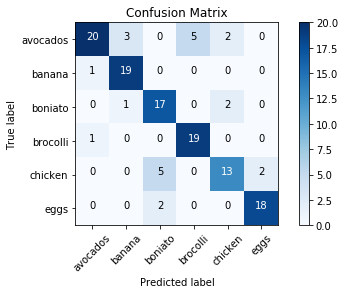

In [22]:
# and let's use the function

cm_plot_labels = ['avocados', "banana","boniato","brocolli","chicken","eggs"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
import pandas as pd
filenames=test_batches.filenames
path=[]
for i in filenames:
    print(i)
    i =i.replace("\\","/")
    print(i)
    path.append(i)

    
prediction = np.argmax(predictions1, axis=-1)
df=pd.DataFrame({
    'filename':path,
    'prediction':prediction
})

df["predction"] = df["prediction"].replace({0:"Chicken",1:"Other"})

In [27]:
filenames=test_batches.filenames
path=[]
for i in filenames:
    print(i)
    i =i.replace("\\","/")
    print(i)
    path.append(i)

avocados\avocados_100.jpg
avocados/avocados_100.jpg
avocados\avocados_101.jpg
avocados/avocados_101.jpg
avocados\avocados_102.jpg
avocados/avocados_102.jpg
avocados\avocados_103.jpg
avocados/avocados_103.jpg
avocados\avocados_104.jpg
avocados/avocados_104.jpg
avocados\avocados_105.jpg
avocados/avocados_105.jpg
avocados\avocados_106.jpg
avocados/avocados_106.jpg
avocados\avocados_107.jpg
avocados/avocados_107.jpg
avocados\avocados_108.jpg
avocados/avocados_108.jpg
avocados\avocados_109.jpg
avocados/avocados_109.jpg
avocados\avocados_110.jpg
avocados/avocados_110.jpg
avocados\avocados_111.jpg
avocados/avocados_111.jpg
avocados\avocados_112.jpg
avocados/avocados_112.jpg
avocados\avocados_113.jpg
avocados/avocados_113.jpg
avocados\avocados_114.jpg
avocados/avocados_114.jpg
avocados\avocados_115.jpg
avocados/avocados_115.jpg
avocados\avocados_116.jpg
avocados/avocados_116.jpg
avocados\avocados_117.jpg
avocados/avocados_117.jpg
avocados\avocados_118.jpg
avocados/avocados_118.jpg
avocados\avo

In [ ]:
df

In [ ]:
test_path+"/"+df.filename[0]

In [ ]:
for index, row in df.iterrows():
    filename = row['filename']
    predction = row['predction']
    print(index)
    print(filename)
    print(predction)

In [ ]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3



plt.figure(figsize=(12, 24))
for index, row in df.iterrows():
    filename = row['filename']
    predction = row['predction']
    img = load_img(test_path+"/"+filename, target_size=Image_Size)
    plt.subplot(10, 4, index+1)
    plt.imshow(img)
    plt.xlabel(predction)

plt.tight_layout()
plt.show()